In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
obj=StandardScaler()
Scale_feature=obj.fit_transform(df[['sepal_width','sepal_length','petal_length','petal_width']])

In [12]:
knn_obj=KMeans(n_clusters=3,random_state=42)
df['clusting']=knn_obj.fit_predict(Scale_feature)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


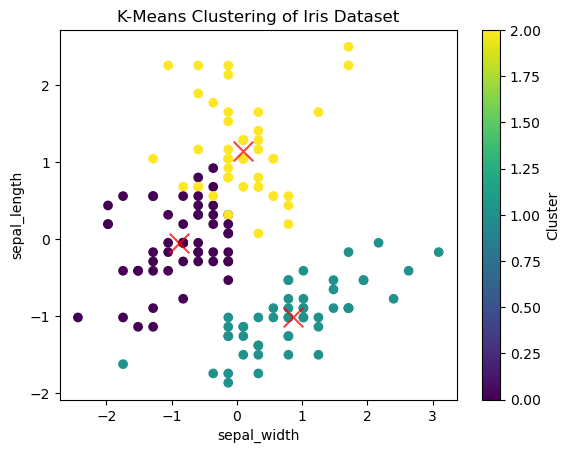

Cluster centers (scaled):
 [[-0.88337647 -0.05021989  0.34773781  0.2815273 ]
 [ 0.85326268 -1.01457897 -1.30498732 -1.25489349]
 [ 0.08842168  1.13597027  0.99615451  1.01752612]]
Cluster centers (original scale):
 [[2.67358491 5.80188679 4.36981132 1.41320755]
 [3.428      5.006      1.462      0.246     ]
 [3.09574468 6.78085106 5.5106383  1.97234043]]
Inertia: 139.8204963597497


In [14]:
# Scatter plot of the first two features
feature=['sepal_width','sepal_length','petal_length','petal_width']
feature1=['sepal_width','sepal_length','petal_length','petal_width']

plt.scatter(Scale_feature[:, 0], Scale_feature[:, 1], c=df['clusting'], cmap='viridis', marker='o')
plt.xlabel(feature[0])
plt.ylabel(feature1[1])
plt.title('K-Means Clustering of Iris Dataset')
plt.colorbar(label='Cluster')

# Mark cluster centers
centers = knn_obj.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()

# Print cluster centers and inertia
print("Cluster centers (scaled):\n", centers)
print("Cluster centers (original scale):\n", obj.inverse_transform(centers))
print("Inertia:", knn_obj.inertia_)